In [ ]:
# %%capture
!pip install layoutparser && pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
!pip uninstall -y Pillow
!pip install Pillow==9.5.0
!pip install pymupdf==1.22.2
!pip install natsort

In [ ]:
!pip install qdrant_client tools frontend git+https://github.com/openai/CLIP.git easyocr

In [ ]:
!python --version

In [1]:
import layoutparser as lp
# model1 = lp.models.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config', 
#                                  extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
#                                  label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

model2 = lp.models.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', 
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch
import io
from PIL import Image, ImageDraw
import numpy as np
import csv
import pandas as pd

from torchvision import transforms

import torch
import os
import fitz

device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
pdf_file = "./docs/Handbook.pdf"
output_directory = './ouput_images/'
# Split the base name and extension
output_directory_path, _ = os.path.splitext(pdf_file)
output_directory_path = os.path.join(output_directory, output_directory_path.split("/")[-1])

print(output_directory_path)

if not os.path.exists(output_directory_path):
    os.makedirs(output_directory_path)

# Open the PDF file
pdf_document = fitz.open(pdf_file)

# Iterate through each page and convert to an image
for page_number in range(pdf_document.page_count):
    # Get the page
    page = pdf_document[page_number]

    # Convert the page to an image
    pix = page.get_pixmap()

    # Create a Pillow Image object from the pixmap
    image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    # Save the image
    image.save(f"./{output_directory_path}/page_{page_number + 1}.png")

# Close the PDF file
pdf_document.close()

./ouput_images/Handbook


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_paths = []
for img_path in os.listdir(f"./{output_directory_path}/"):
    image_paths.append(str(os.path.join(f"./{output_directory_path}/", img_path)))

image_paths

['././ouput_images/Handbook/page_2.png',
 '././ouput_images/Handbook/page_1.png',
 '././ouput_images/Handbook/page_6.png',
 '././ouput_images/Handbook/page_4.png',
 '././ouput_images/Handbook/page_5.png',
 '././ouput_images/Handbook/page_7.png',
 '././ouput_images/Handbook/page_3.png']

In [6]:
from natsort import natsorted
image_paths = natsorted(image_paths)
image_paths

['././ouput_images/Handbook/page_1.png',
 '././ouput_images/Handbook/page_2.png',
 '././ouput_images/Handbook/page_3.png',
 '././ouput_images/Handbook/page_4.png',
 '././ouput_images/Handbook/page_5.png',
 '././ouput_images/Handbook/page_6.png',
 '././ouput_images/Handbook/page_7.png']

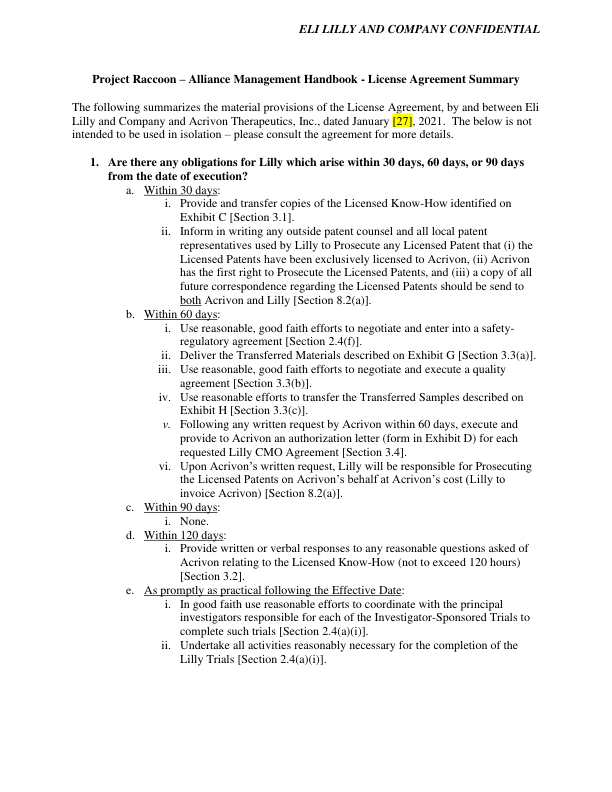

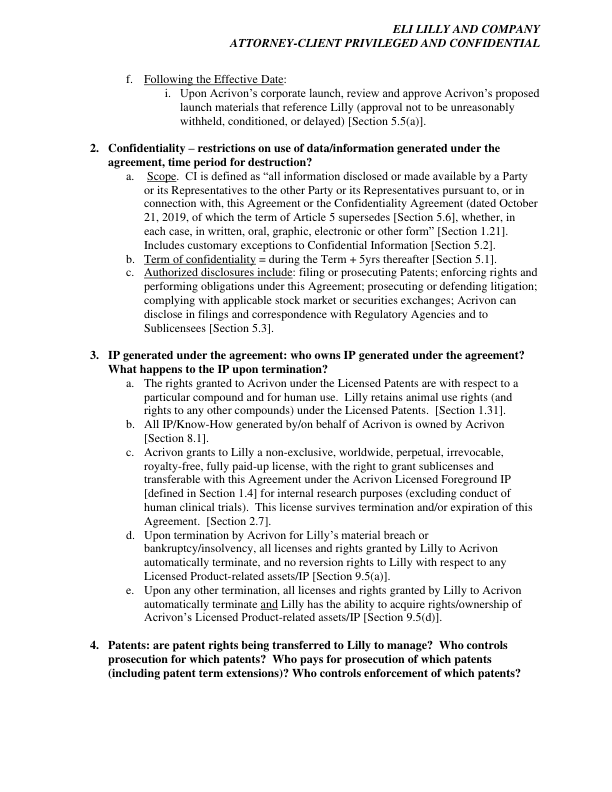

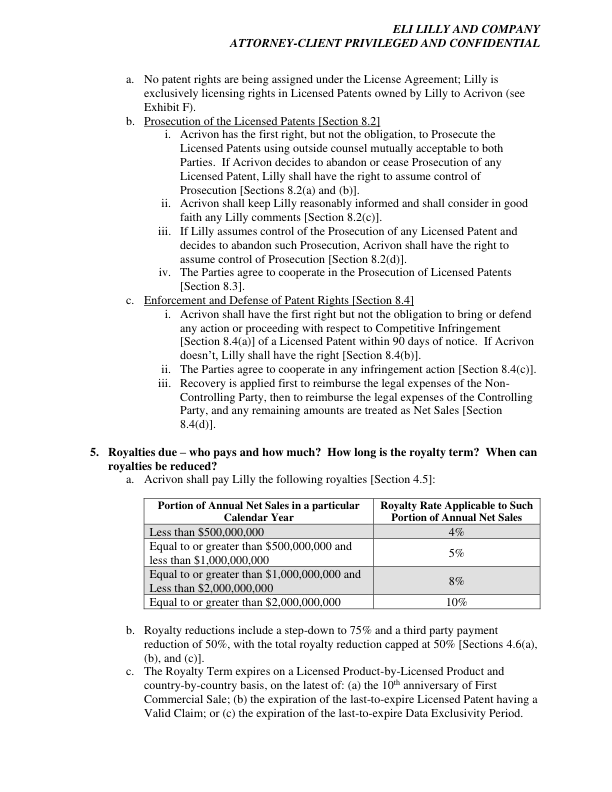

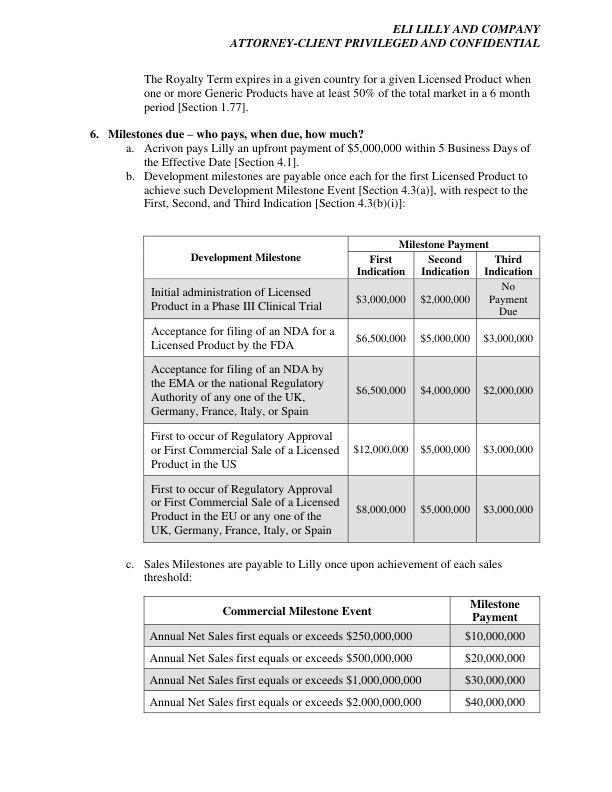

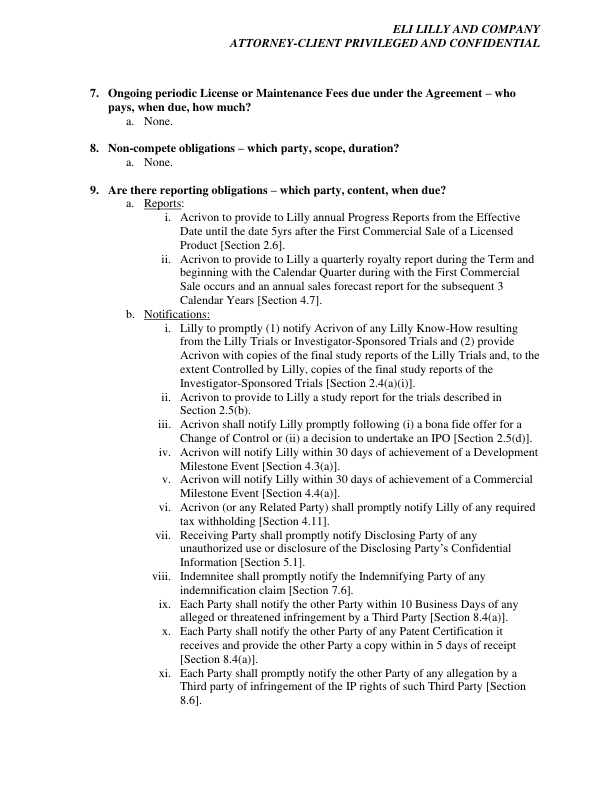

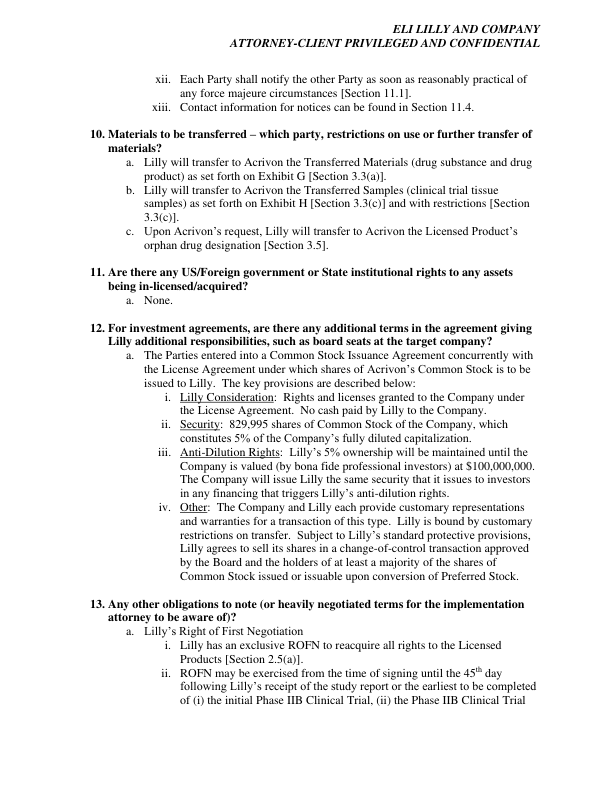

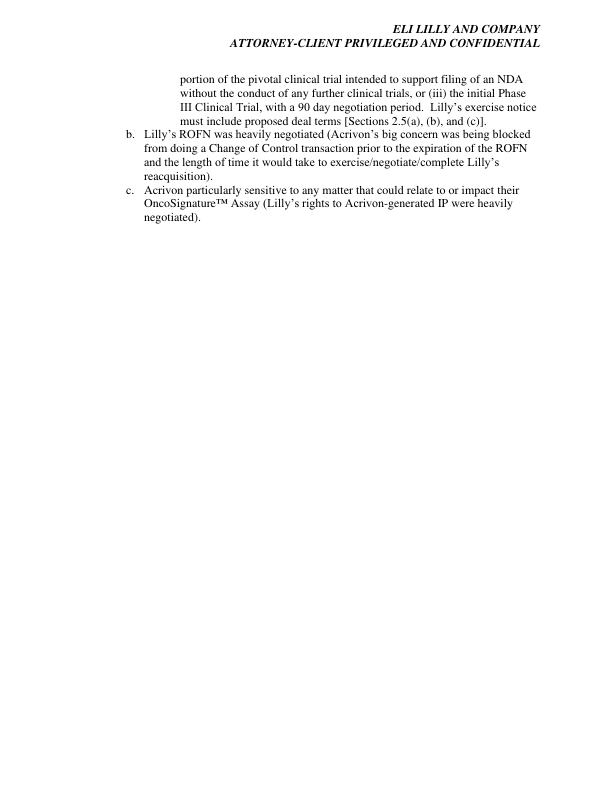

In [7]:
from IPython.display import Image, display

for imageName in image_paths:
    display(Image(filename=imageName))

In [8]:
import cv2
import matplotlib.pyplot as plt

annotated_output_directory = f"./{output_directory_path}_annotated"
if not os.path.exists(annotated_output_directory):
    os.makedirs(annotated_output_directory)

color_map = {
    'Text':   'red',
    'Title':  'blue',
    'List':   'yellow',
    'Table':  'purple',
    'Figure': 'green',
}

def annotate_image(imageName):
    print(imageName)
    image = cv2.imread(imageName)
    layout = model2.detect(image)
    for layout_region in layout:
        print(layout_region.type)
    
    new_image = lp.draw_box(image, layout, box_width=1, color_map=color_map)
    new_image_path = os.path.join(annotated_output_directory, imageName.split("/")[-1])
    new_image.save(new_image_path)
    display(new_image)

././ouput_images/Handbook/page_1.png


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1686274778240/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


List
Text
List
Text
Title


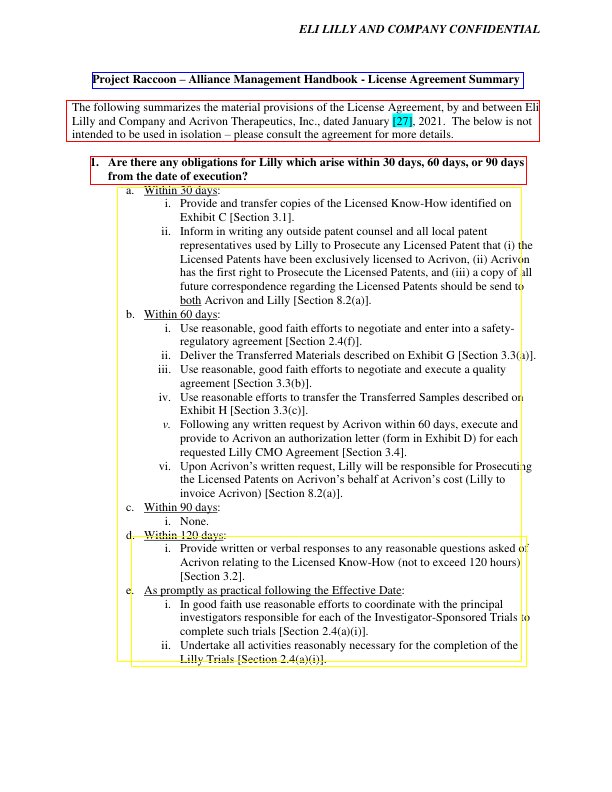

././ouput_images/Handbook/page_2.png
List
List
Text
Text


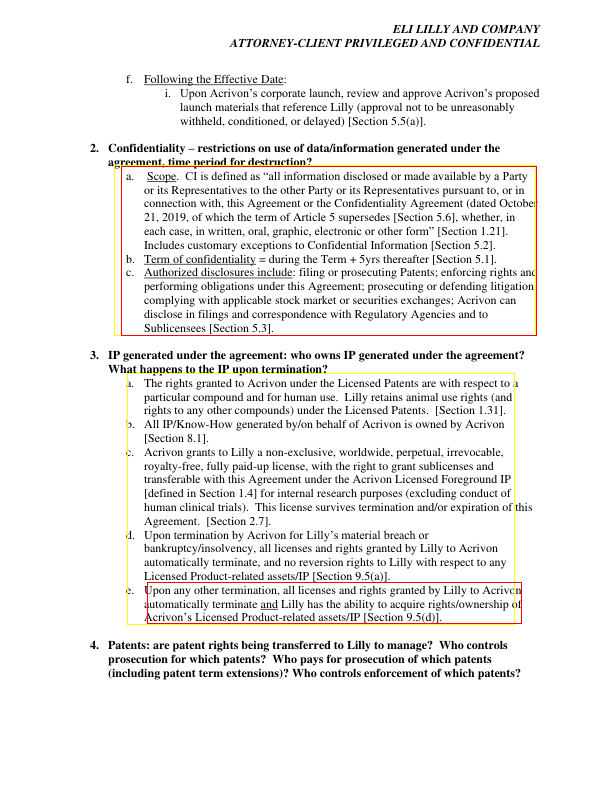

././ouput_images/Handbook/page_3.png
List
Text
List
List


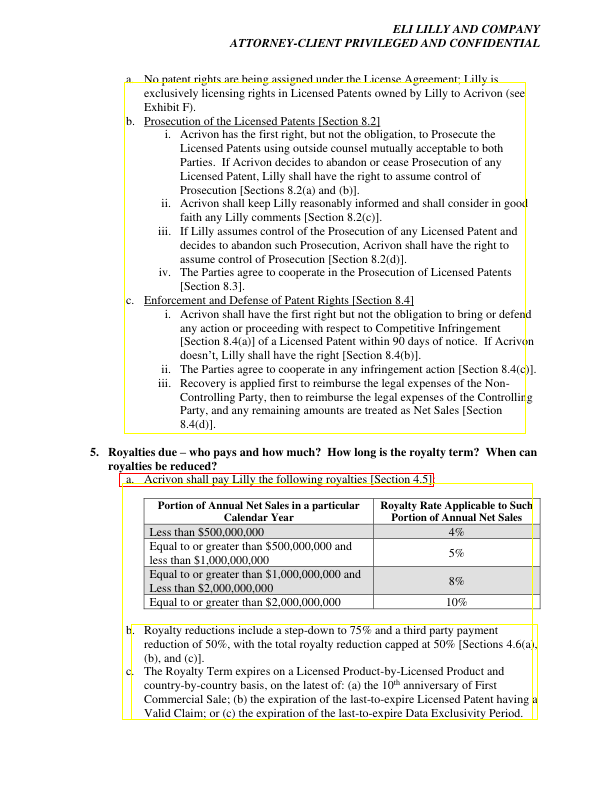

././ouput_images/Handbook/page_4.png
Figure
List
Text
Text
Figure


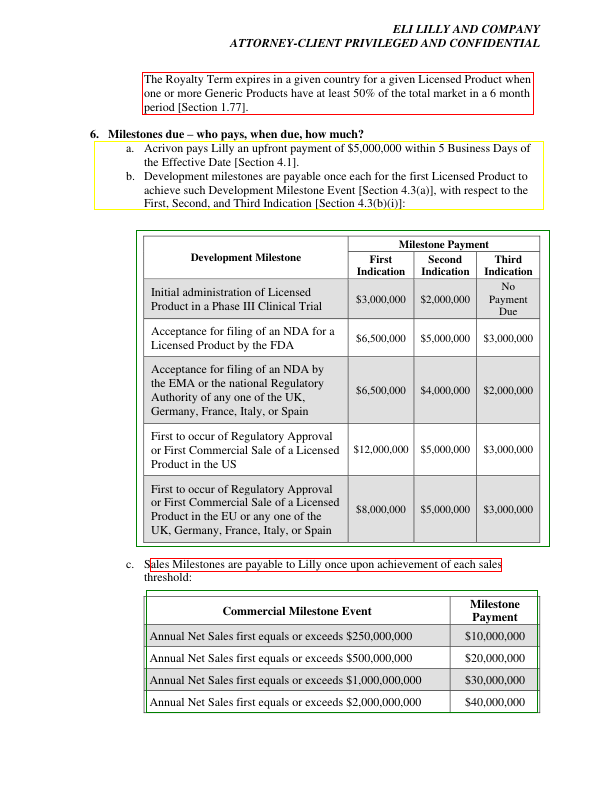

././ouput_images/Handbook/page_5.png
List
List


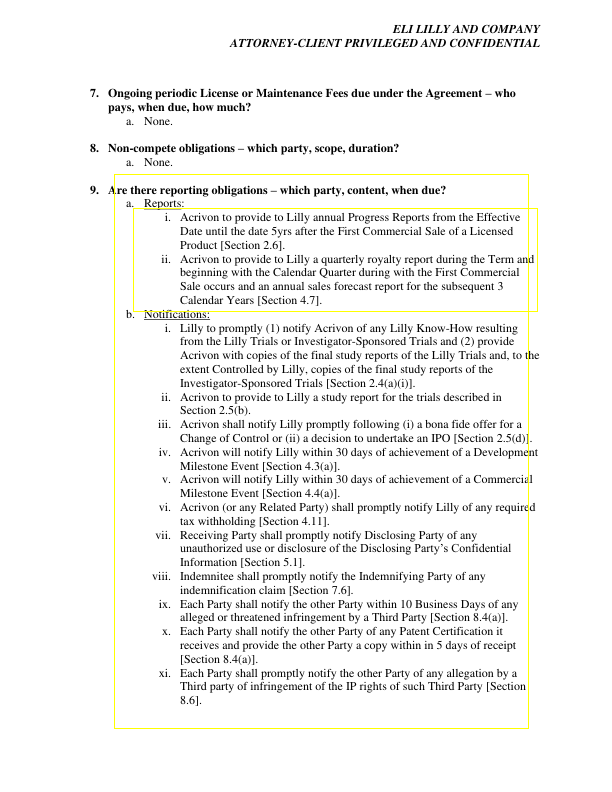

././ouput_images/Handbook/page_6.png
List
List
Text
List
Text
Title


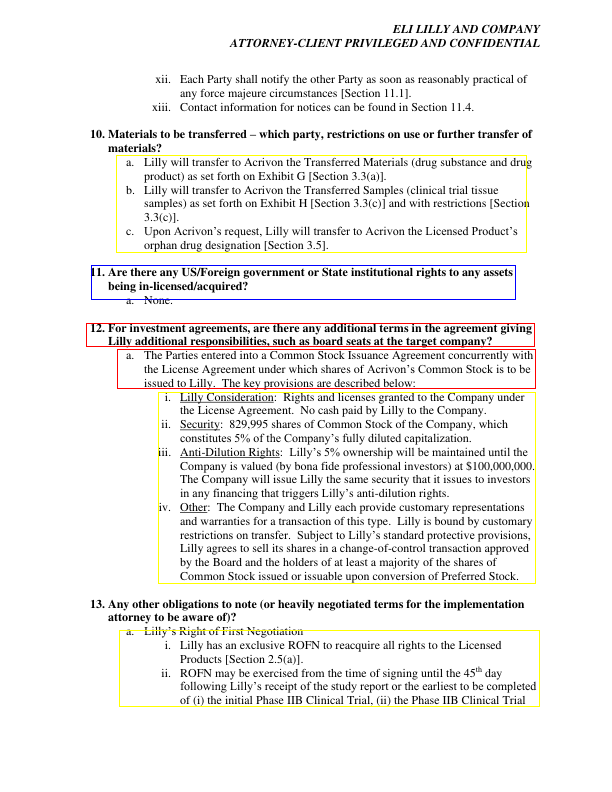

././ouput_images/Handbook/page_7.png
List
Text


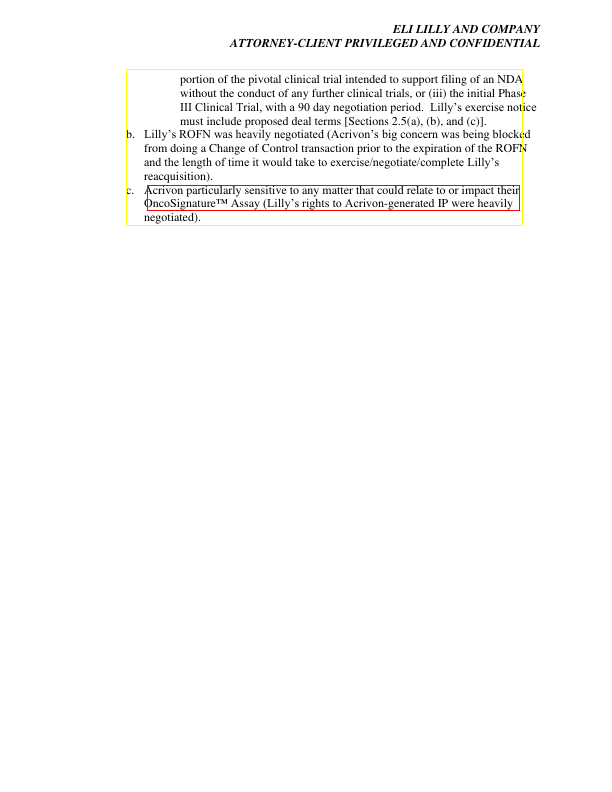

In [9]:
for img in image_paths:
    annotate_image(img)